In [1]:
import json
import matplotlib.pyplot as plt
import pandas as pd
import sys
import os
import numpy as np
import math

df = pd.read_csv('q2.csv')
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df.set_index(['Country'],inplace=True)
df.sort_index(inplace=True)

In [2]:
df

,GHRP,Income classification according to WB,Net_ODA_received_perc_of_GNI,Aid dependence,Volume of remittances in USD as a proportion of total GDP percent 2014-18,Remittances,Food imports percent of total merchandise exports,food import dependence,Fuels ores and metals exports percent of total merchandise exports,primary commodity export dependence,...,Total reserves in months of imports 2018,Foreign currency reserves,"Foreign direct investment, net inflows percent of GDP",Foreign direct investment,Covid_19_Economic_exposure_index,Covid_19_Economic_exposure_index_Ex_aid_and_FDI,Covid_19_Economic_exposure_index_Ex_aid_and_FDI_and_food_import,Cities,avg_latitude,avg_longitude
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Yes,LIC,"19,37","7,2","1,99","0,0","32,3","10,0","11,6","1,5",...,"12,19","0,0","0,62","0,2","2,4","2,0","0,4","{""Country"":""Afghanistan"",""City"":""`Aaqadari Yos...",34.046741,67.266813
Albania,No,MIC,"1,20","0,0","9,68","2,3","13,5","5,4","3,7","0,5",...,"6,37","0,0","7,97","3,2","3,4","4,0","3,7","{""Country"":""Albania"",""City"":""1 Maj"",""Latitude""...",41.088976,20.014610
Algeria,No,MIC,"0,11","0,0","1,07","0,0","20,2","8,1","94,7","10,0",...,x,x,"0,87","0,3","3,5","4,8","4,0","{""Country"":""Algeria"",""City"":""3 Marabouts"",""Lat...",35.602693,3.235778
Angola,Yes,MIC,"0,19","0,0","0,00","0,0","19,8","7,9","98,6","10,0",...,"5,41","1,2","-5,42","0,0","3,8","5,0","4,4","{""Country"":""Angola"",""City"":""1.0 de Maio"",""Lati...",-10.394025,16.401273
Antigua and Barbuda,No,HIC,"0,69","0,0","2,16","0,0","27,8","10,0","0,3","0,0",...,"3,21","5,6","8,39","3,4","4,7","5,7","4,9","{""Country"":""Antigua and Barbuda"",""City"":""Aberd...",17.085519,-61.791439
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Venezuela,Yes,MIC,No data,x,"0,03","0,0",x,x,"88,0","10,0",...,x,x,x,x,"4,3","4,3","4,3","{""Country"":""Venezuela"",""City"":""1 Beneficio"",""L...",9.326775,-67.788678
Vietnam,No,MIC,"1,12","0,0","6,51","0,8","8,0","3,2","3,1","0,4",...,"2,53","6,9","6,32","2,5","2,7","3,2","3,2","{""Country"":""Vietnam"",""City"":""A\u00e0m T\u00e2m...",17.427567,106.246390
Yemen,Yes,LIC,"10,37","2,7","12,45","3,7","46,9","10,0","0,5","0,1",...,x,x,"-1,05","0,0","3,3","4,1","2,6","{""Country"":""Yemen"",""City"":""Abadila"",""Latitude""...",14.588661,45.226203


In [3]:
list(df)

['GHRP',
 'Income classification according to WB',
 'Net_ODA_received_perc_of_GNI',
 'Aid dependence',
 'Volume of remittances in USD as a proportion of total GDP percent 2014-18',
 'Remittances',
 'Food imports percent of total merchandise exports',
 'food import dependence ',
 'Fuels ores and metals exports percent of total merchandise exports',
 'primary commodity export dependence',
 'tourism as percentage of GDP',
 'tourism dependence',
 'General government gross debt Percent of GDP 2019',
 'Government indeptedness',
 'Total reserves in months of imports 2018',
 'Foreign currency reserves',
 'Foreign direct investment, net inflows percent of GDP',
 'Foreign direct investment',
 'Covid_19_Economic_exposure_index',
 'Covid_19_Economic_exposure_index_Ex_aid_and_FDI',
 'Covid_19_Economic_exposure_index_Ex_aid_and_FDI_and_food_import',
 'Cities',
 'avg_latitude',
 'avg_longitude']

In [10]:
df.reset_index(inplace=True)
selected_columns = ["Income classification according to WB", "Covid_19_Economic_exposure_index_Ex_aid_and_FDI", "Covid_19_Economic_exposure_index_Ex_aid_and_FDI_and_food_import" , "Foreign direct investment, net inflows percent of GDP", "Foreign direct investment"]
df_target = df[selected_columns]

In [12]:
df_target

,Income classification according to WB,Covid_19_Economic_exposure_index_Ex_aid_and_FDI,Covid_19_Economic_exposure_index_Ex_aid_and_FDI_and_food_import,"Foreign direct investment, net inflows percent of GDP",Foreign direct investment
0,LIC,"2,0","0,4","0,62","0,2"
1,MIC,"4,0","3,7","7,97","3,2"
2,MIC,"4,8","4,0","0,87","0,3"
3,MIC,"5,0","4,4","-5,42","0,0"
4,HIC,"5,7","4,9","8,39","3,4"
...,...,...,...,...,...
184,MIC,"4,3","4,3",x,x
185,MIC,"3,2","3,2","6,32","2,5"
186,LIC,"4,1","2,6","-1,05","0,0"
187,MIC,"5,4","6,1","1,53","0,6"


In [15]:
df_target.replace('x', np.nan, regex=True, inplace=True)

/Applications/anaconda3/envs/COMP9321/lib/python3.8/site-packages/pandas/core/frame.py:4524: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [16]:
df_target.replace(',', '.', regex=True, inplace=True)

In [17]:
df_target

,Income classification according to WB,Covid_19_Economic_exposure_index_Ex_aid_and_FDI,Covid_19_Economic_exposure_index_Ex_aid_and_FDI_and_food_import,"Foreign direct investment, net inflows percent of GDP",Foreign direct investment
0,LIC,2.0,0.4,0.62,0.2
1,MIC,4.0,3.7,7.97,3.2
2,MIC,4.8,4.0,0.87,0.3
3,MIC,5.0,4.4,-5.42,0.0
4,HIC,5.7,4.9,8.39,3.4
...,...,...,...,...,...
184,MIC,4.3,4.3,NaN,NaN
185,MIC,3.2,3.2,6.32,2.5
186,LIC,4.1,2.6,-1.05,0.0
187,MIC,5.4,6.1,1.53,0.6


In [18]:
df_target["Covid_19_Economic_exposure_index_Ex_aid_and_FDI"] = pd.to_numeric(df_target["Covid_19_Economic_exposure_index_Ex_aid_and_FDI"])
df_target["Covid_19_Economic_exposure_index_Ex_aid_and_FDI_and_food_import"] = pd.to_numeric(df_target["Covid_19_Economic_exposure_index_Ex_aid_and_FDI_and_food_import"])
df_target["Foreign direct investment"] = pd.to_numeric(df_target["Foreign direct investment"])
df_target["Foreign direct investment, net inflows percent of GDP"] = pd.to_numeric(df_target["Foreign direct investment, net inflows percent of GDP"])

<ipython-input-18-91dc91594f83>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_target["Covid_19_Economic_exposure_index_Ex_aid_and_FDI"] = pd.to_numeric(df_target["Covid_19_Economic_exposure_index_Ex_aid_and_FDI"])
<ipython-input-18-91dc91594f83>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_target["Covid_19_Economic_exposure_index_Ex_aid_and_FDI_and_food_import"] = pd.to_numeric(df_target["Covid_19_Economic_exposure_index_Ex_aid_and_FDI_and_food_import"])
<ipython-input-18-91dc91594f83>:3: Setti

In [20]:
df_target.dtypes

Income classification according to WB                               object
Covid_19_Economic_exposure_index_Ex_aid_and_FDI                    float64
Covid_19_Economic_exposure_index_Ex_aid_and_FDI_and_food_import    float64
Foreign direct investment, net inflows percent of GDP              float64
Foreign direct investment                                          float64
dtype: object

In [21]:
df9 = df_target.groupby(["Income classification according to WB"])["Income classification according to WB", "Covid_19_Economic_exposure_index_Ex_aid_and_FDI", "Covid_19_Economic_exposure_index_Ex_aid_and_FDI_and_food_import" , "Foreign direct investment, net inflows percent of GDP", "Foreign direct investment"].agg('mean')

<ipython-input-21-0249351215c8>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df9 = df_target.groupby(["Income classification according to WB"])["Income classification according to WB", "Covid_19_Economic_exposure_index_Ex_aid_and_FDI", "Covid_19_Economic_exposure_index_Ex_aid_and_FDI_and_food_import" , "Foreign direct investment, net inflows percent of GDP", "Foreign direct investment"].agg('mean')


In [22]:
df9

,Covid_19_Economic_exposure_index_Ex_aid_and_FDI,Covid_19_Economic_exposure_index_Ex_aid_and_FDI_and_food_import,"Foreign direct investment, net inflows percent of GDP",Foreign direct investment
Income classification according to WB,,,,
HIC,3.909259,3.750000,1.932037,1.511111
LIC,3.950000,3.430000,5.292593,1.937037
MIC,3.714423,3.415385,3.529091,1.417172


<AxesSubplot:xlabel='Income classification according to WB'>

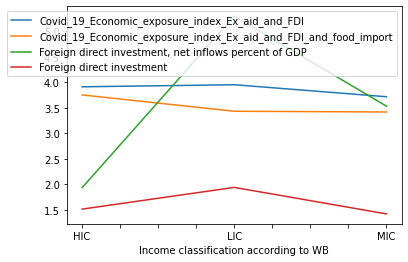

In [23]:
df9.plot()

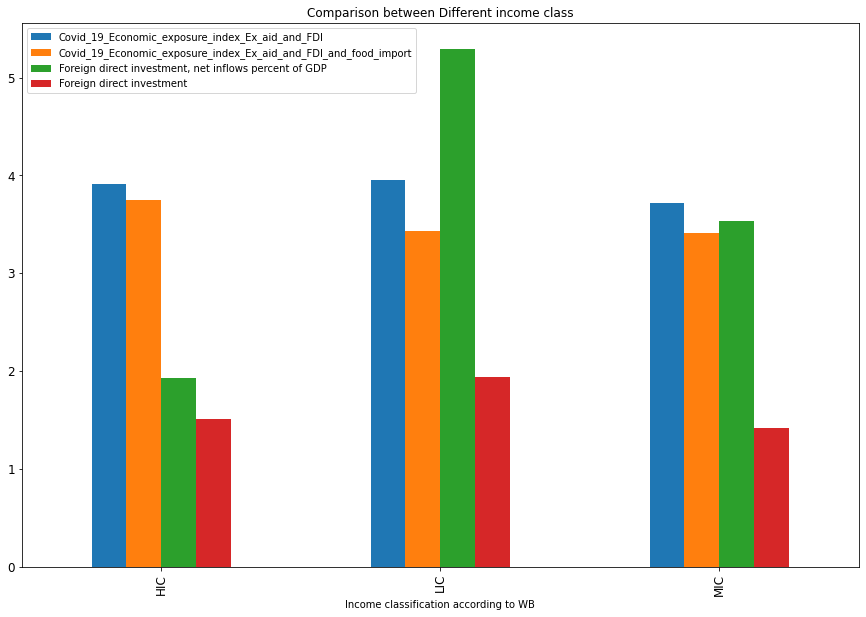

In [27]:
# df_plot = df9.set_index("Income classification according to WB")
ax = df9.plot(kind='bar', title ="Comparison between Different income class", figsize=(15, 10), legend=True, fontsize=12)

In [28]:
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

In [36]:
ax.show()

AttributeError: 'AxesSubplot' object has no attribute 'show'

<ipython-input-11-45269b257a6b>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_target["Covid_19_Economic_exposure_index_Ex_aid_and_FDI"] = pd.to_numeric(df_target["Covid_19_Economic_exposure_index_Ex_aid_and_FDI"])
<ipython-input-11-45269b257a6b>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_target["Covid_19_Economic_exposure_index_Ex_aid_and_FDI_and_food_import"] = pd.to_numeric(df_target["Covid_19_Economic_exposure_index_Ex_aid_and_FDI_and_food_import"])
<ipython-input-11-45269b257a6b>:22: Se

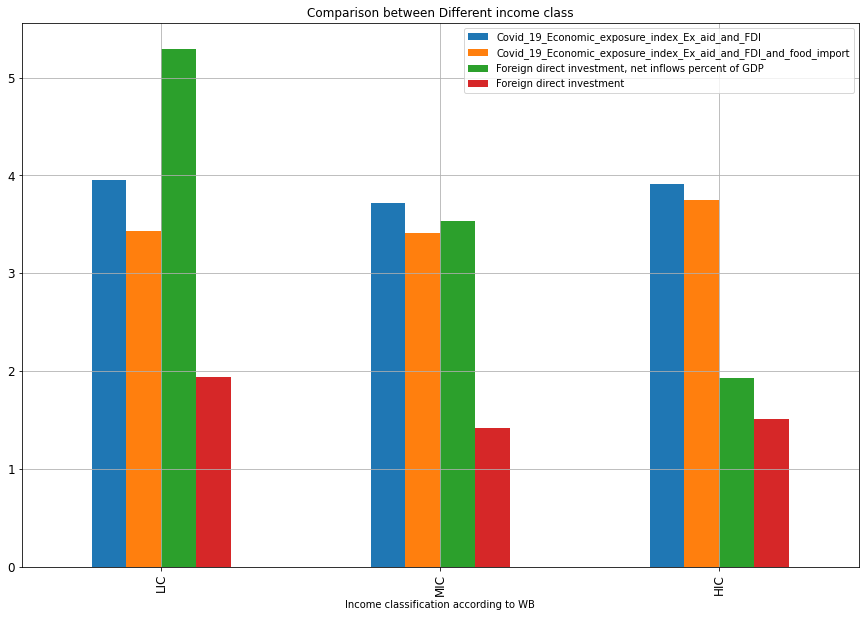

In [11]:
import json
import matplotlib.pyplot as plt
import pandas as pd
import sys
import os
import numpy as np
import math

df2 = pd.read_csv('q2.csv')
df2.drop(['Unnamed: 0'], axis=1, inplace=True)
df2.set_index(['Country'],inplace=True)
df2.sort_index(inplace=True)

df2.reset_index(inplace=True)
selected_columns = ["Income classification according to WB", "Covid_19_Economic_exposure_index_Ex_aid_and_FDI", "Covid_19_Economic_exposure_index_Ex_aid_and_FDI_and_food_import" , "Foreign direct investment, net inflows percent of GDP", "Foreign direct investment"]
df_target = df2[selected_columns]
df_target.replace('x', np.nan, regex=True, inplace=True)
df_target.replace(',', '.', regex=True, inplace=True)

df_target["Covid_19_Economic_exposure_index_Ex_aid_and_FDI"] = pd.to_numeric(df_target["Covid_19_Economic_exposure_index_Ex_aid_and_FDI"])
df_target["Covid_19_Economic_exposure_index_Ex_aid_and_FDI_and_food_import"] = pd.to_numeric(df_target["Covid_19_Economic_exposure_index_Ex_aid_and_FDI_and_food_import"])
df_target["Foreign direct investment"] = pd.to_numeric(df_target["Foreign direct investment"])
df_target["Foreign direct investment, net inflows percent of GDP"] = pd.to_numeric(df_target["Foreign direct investment, net inflows percent of GDP"])
df9 = df_target.groupby(["Income classification according to WB"])["Income classification according to WB", "Covid_19_Economic_exposure_index_Ex_aid_and_FDI", "Covid_19_Economic_exposure_index_Ex_aid_and_FDI_and_food_import" , "Foreign direct investment, net inflows percent of GDP", "Foreign direct investment"].agg('mean')
df9.sort_index()
# ax = df9.plot(kind='bar', title ="Comparison between Different income class", figsize=(15, 10), legend=True, fontsize=12)


order = ['LIC', 'MIC', 'HIC']
mapping = {income_class: i for i, income_class in enumerate(order)}
key = df9.index.map(mapping)
df_res = df9.iloc[key.argsort()]
ax = df_res.plot(kind='bar', title ="Comparison between Different income class", figsize=(15, 10), legend=True, fontsize=12)
ax.grid()
